# This is a test. 

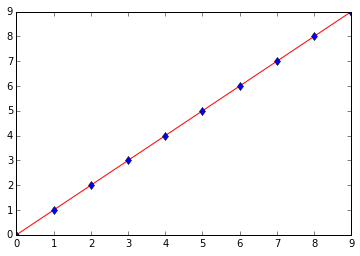

In [3]:
x = range (10)
y = range (10)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot (x, y, 'r-')
plt.plot (x, y, 'bd')

___


## Obtaining

1. Sequencing coverage
2. Nucleotides frequencies
3. Most frequent nucleotides
4. The consensus sequence


## Saving all as a .csv file

In [4]:
exec (open("/Users/markov/pandata/Dengomics/scripts/functions.py").read ())
refgenome_file = "/Users/markov/pandata/Dengomics/pDVWSK601-NGC virus.gb"
getting_cover_ntfreqs ("/Users/markov/pandata/Dengomics/reads_subset.bam", "/Users/markov/dengue/data/partial_denv_coverage_and_ntcounts.csv")

aagacagattctttgaggg
tttttttcgtggaccgacaaagacagattctttgaggg
                 As            Cs            Gs     Ns            Ts  \
count  10705.000000  10705.000000  10705.000000  10705  10705.000000   
mean      66.829239     42.120037     52.204297      0     43.142644   
std       96.572196     83.340503     89.485509      0     83.197528   
min        0.000000      0.000000      0.000000      0      0.000000   
25%        1.000000      0.000000      1.000000      0      0.000000   
50%        2.000000      1.000000      2.000000      0      2.000000   
75%      174.000000      3.000000     80.000000      0      5.000000   
max      329.000000    330.000000    336.000000      0    336.000000   

           coverage    majorbases     position  
count  10705.000000  10705.000000  10705.00000  
mean     204.387576    200.083699   5358.00000  
std       44.815353     44.463807   3090.41165  
min        1.000000      1.000000      6.00000  
25%      180.000000    176.000000   2682.00000 

In [5]:
counts_dataframe = pd.read_csv ("/Users/markov/dengue/data/partial_denv_coverage_and_ntcounts.csv")

correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe ['majorsequence']))
print (correction)

16138
-1852


Current figure size: [18.0, 8.0]


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


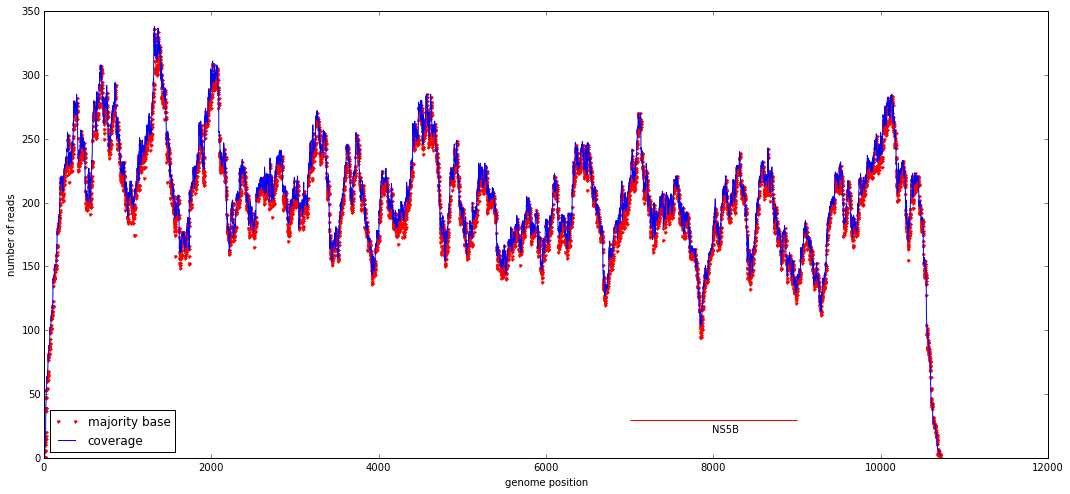

In [6]:

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')
plt.plot (counts_dataframe ['position'], counts_dataframe ['coverage'], 'b-') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
plt.hlines(30, 7000, 9000, colors='r', linestyles='solid')
plt.text(8000,20,'NS5B',rotation=0)
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['majority base', 'coverage'], loc = 'lower left')

Current figure size: [18.0, 8.0]


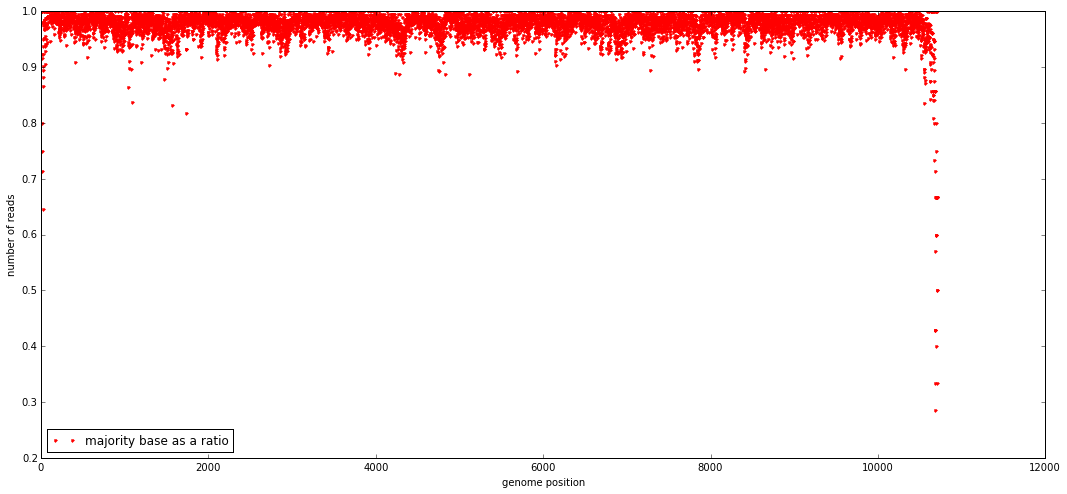

In [7]:
majorbase_ratio = list ()
coverage = counts_dataframe ['coverage']
majorbases = counts_dataframe ['majorbases']
for x in range (len(coverage)):
    majorbase_ratio.append (majorbases [x]/coverage[x])
    
def ratio(x,y):
    return x/y

majorbase_ratio = list(map(ratio, majorbases, coverage))
    

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], majorbase_ratio, 'r.') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['majority base as a ratio', 'coverage'], loc = 'lower left')

Current figure size: [18.0, 8.0]


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


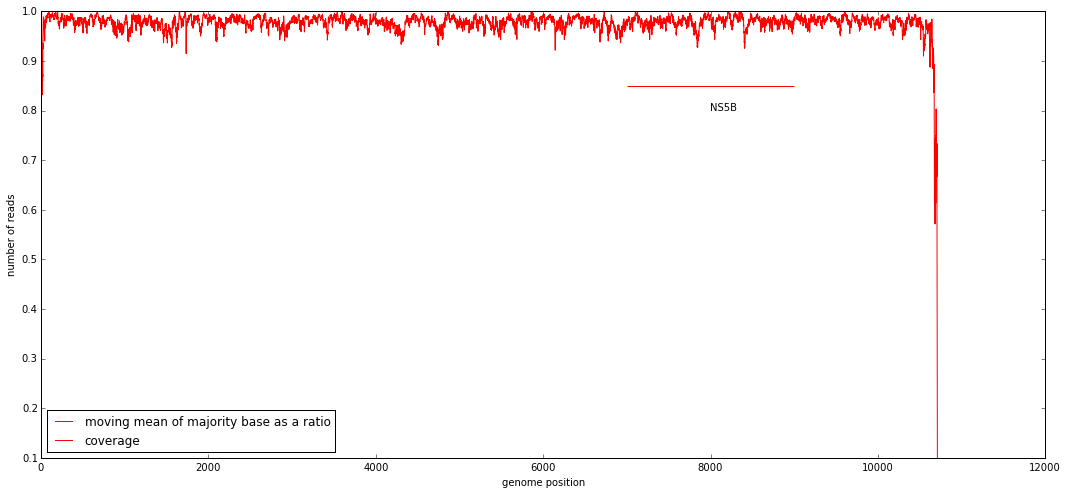

In [8]:
moving_average = (runningMeanFast (majorbase_ratio, 5))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
plt.hlines(0.85, 7000, 9000, colors='r', linestyles='solid') #, label='NS5B')
plt.text(8000,0.8,'NS5B',rotation=0)
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['moving mean of majority base as a ratio', 'coverage'], loc = 'lower left')

# Title

In [9]:
import sys
annotations = '/Users/markov/pandata/Dengomics/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
print (correction)
print (annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

-1852
["SP\prM": 391 to 432, "Capsid": 91 to 432, "prM": 433 to 930, "M\(mature\form)": 706 to 930, E: 931 to 2415, "Beta-lactamase": -1708 to -848, 5UTR: -5 to 90, "NS1": 2416 to 3471, "NS2A": 3472 to 4125, "NS2B": 4126 to 4515, "NS3": 4516 to 6369, "NS4A": 6370 to 6819, "NS4B": 6820 to 7563, "NS5": 7564 to 10266, 3UTR: 10267 to 10717]


In [1]:

moving_average = (runningMeanFast (majorbase_ratio, 5))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
plt.axis ([0, 11000, 0.8, 1])
color = 0.0
for gene in annots_list:
    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['moving mean of majority base as a ratio', 'coverage'], loc = 'lower right')

NameError: name 'runningMeanFast' is not defined

In [11]:
codonpos1, codonpos2, codonpos3 = determin_codon_posit(annots_list[2], majorbase_ratio)


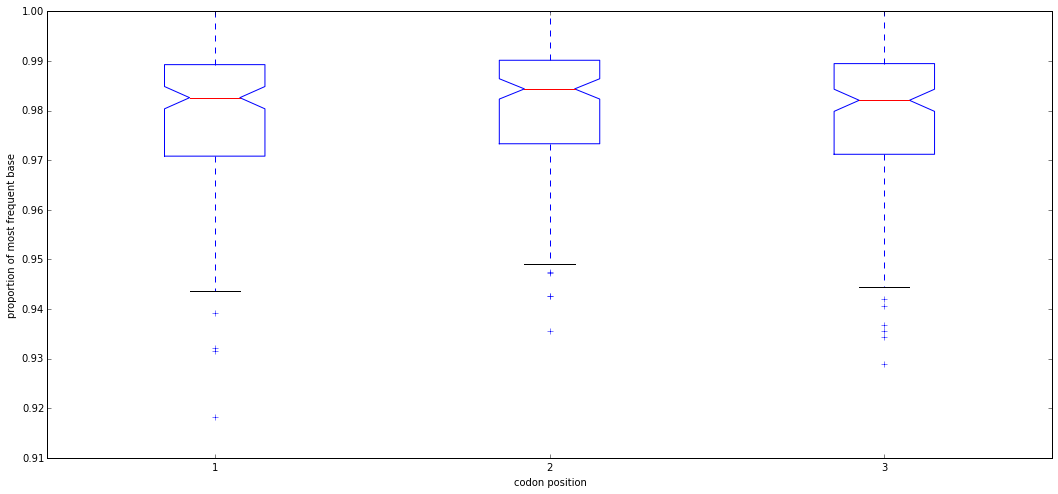

In [12]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.xlabel ('codon position')
plt.ylabel ('proportion of most frequent base')
#plt.axis ([0, 11000, 0.8, 1])
plt.boxplot([codonpos1, codonpos2, codonpos3], 1)
None # this removes lots of unwanted output that matplotlib throws out.

10705


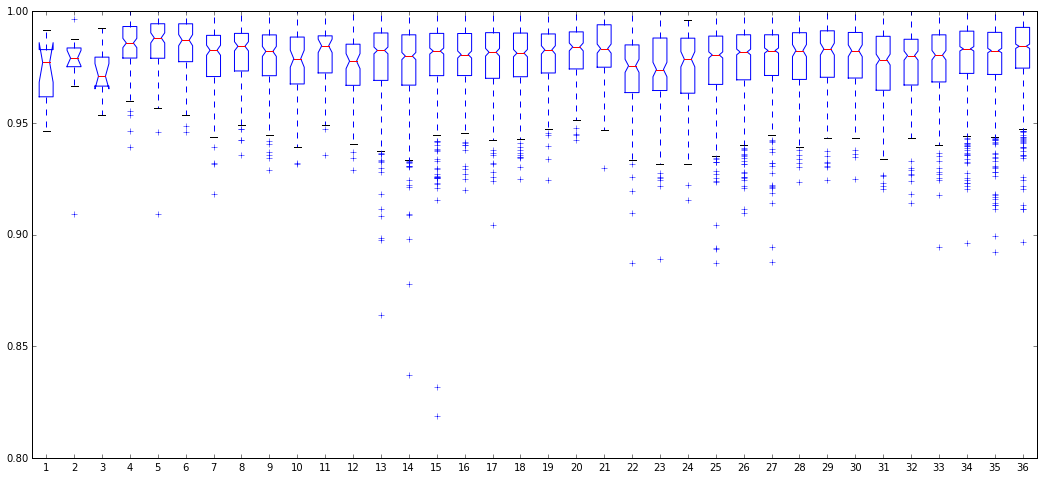

In [13]:
geneslist = list()
print (len(majorbase_ratio))
for x in annots_list:
    
    if x.start>0 and x.end< len(majorbase_ratio):
        list1, list2, list3 = determin_codon_posit(x, majorbase_ratio)
        geneslist.append (list1)
        geneslist.append (list2)
        geneslist.append (list3)

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
#plt.xlabel ('genome position')
#plt.ylabel ('number of reads')
#plt.axis ([0, 11000, 0.8, 1])
plt.boxplot(geneslist, 1)
None

In [15]:
exec (open("/Users/markov/dengue/scripts/functions_alternative_tepmorary.py").read ())
refgenome_file = "/Users/markov/dengue/data/pDVWSK601-NGC virus.gb"
getting_cover_ntfreqs ("/Users/markov/dengue/data/twoway_noadapt6_rehead_sortindex.bam", "/Users/markov/dengue/data/denv_cover_ntcounts_nopairs.csv")



ccgacaaagacagattctt
agttgttcgtcttcgtggaccgacaaagacagattctt
                  As             Cs             Gs     Ns             Ts  \
count   10723.000000   10723.000000   10723.000000  10723   10723.000000   
mean    47433.738226   29899.430104   36527.692157      0   30567.360440   
std     69209.118154   59653.727313   63965.899126      0   59673.261062   
min         0.000000       0.000000       0.000000      0       0.000000   
25%       331.000000     155.000000     175.000000      0     314.000000   
50%       731.000000     442.000000     374.000000      0     667.000000   
75%    125393.500000    1040.000000   62157.000000      0    2510.000000   
max    237950.000000  237516.000000  241006.000000      0  239846.000000   

            coverage     majorbases      position  
count   10723.000000   10723.000000  10723.000000  
mean   201714.940408  142830.541266   5361.000000  
std     42782.201712   31771.893467   3095.607802  
min        49.000000       1.000000      0.00000